In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Fake_jobs_DataSet = pd.read_csv('fake_job_postings.csv' , sep = ',')
Fake_jobs_DataSet

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [3]:
Fake_jobs_DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [4]:
Features_name = list(Fake_jobs_DataSet.columns)
Features_name

['job_id',
 'title',
 'location',
 'department',
 'salary_range',
 'company_profile',
 'description',
 'requirements',
 'benefits',
 'telecommuting',
 'has_company_logo',
 'has_questions',
 'employment_type',
 'required_experience',
 'required_education',
 'industry',
 'function',
 'fraudulent']

In [5]:
Fake_jobs_DataSet['fraudulent'].unique()

array([0, 1], dtype=int64)

In [6]:
Fake_jobs_DataSet.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [7]:
Fake_jobs_DataSet['industry'].value_counts()

Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
                                       ... 
Shipbuilding                              1
Sporting Goods                            1
Museums and Institutions                  1
Wine and Spirits                          1
Ranching                                  1
Name: industry, Length: 131, dtype: int64

In [8]:
Fake_jobs_DataSet['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [9]:
Indust_Fraud_DataSet = Fake_jobs_DataSet[ ['industry', 'fraudulent']]
Indust_Fraud_DataSet

,industry,fraudulent
0,NaN,0
1,Marketing and Advertising,0
2,NaN,0
3,Computer Software,0
4,Hospital & Health Care,0
...,...,...
17875,Computer Software,0
17876,Internet,0
17877,NaN,0
17878,Graphic Design,0


In [10]:
def Fraud_nbr ():
    j = 0
    for i in range(len(Indust_Fraud_DataSet)):
        
        if(Indust_Fraud_DataSet.iloc[i , 1] == 1):
            j = j + 1
    return j

Fraud_nbr ()

866

In [11]:
#for i in range(len(Indust_Fraud_DataSet)):
#    if(Indust_Fraud_DataSet.iloc[i , 1] == 0):
#        Indust_Fraud_DataSet.drop(index = i)
        
#Indust_Fraud_DataSet

In [13]:
Fraud_Jobs_DataSet = []


for i in range(len(Indust_Fraud_DataSet)):
    if(Indust_Fraud_DataSet.iloc[i , 1] == 1):
       
        Fraud_Jobs_DataSet.append( Indust_Fraud_DataSet.iloc[i , 0]) 
        
Fraud_Jobs_DataSet

['Oil & Energy',
 nan,
 'Electrical/Electronic Manufacturing',
 nan,
 'Oil & Energy',
 'Automotive',
 'Computer Software',
 'Information Technology and Services',
 'Computer Networking',
 'Hospital & Health Care',
 'Oil & Energy',
 'Information Technology and Services',
 'Oil & Energy',
 'Information Technology and Services',
 'Oil & Energy',
 'Oil & Energy',
 'Oil & Energy',
 nan,
 'Oil & Energy',
 'Financial Services',
 'Retail',
 'Hospitality',
 'Oil & Energy',
 'Hospitality',
 'Hospital & Health Care',
 'Hospital & Health Care',
 'Hospital & Health Care',
 'Information Technology and Services',
 'Oil & Energy',
 nan,
 'Hospital & Health Care',
 nan,
 'Information Technology and Services',
 'Hospitality',
 'Oil & Energy',
 'Oil & Energy',
 'Accounting',
 'Leisure, Travel & Tourism',
 'Oil & Energy',
 'Oil & Energy',
 'Oil & Energy',
 'Telecommunications',
 'Oil & Energy',
 'Oil & Energy',
 'Oil & Energy',
 'Oil & Energy',
 nan,
 'Accounting',
 'Oil & Energy',
 'Information Technolog

In [17]:
from collections import Counter

num_values = len(Counter(Fraud_Jobs_DataSet).keys())
print(num_values)

63


(array([109., 275.,   4.,   5.,   5.,  32.,  12.,  51.,  35.,   5.,  14.,
         57.,  21.,  26.,  24.,  45.,  24.,   1.,   3.,   3.,   6.,   6.,
          2.,   1.,   4.,   1.,   6.,  15.,   1.,   1.,   1.,   1.,   1.,
          1.,   2.,   2.,   2.,   8.,   3.,   2.,   5.,   1.,   1.,   4.,
          3.,   3.,   3.,   3.,   2.,   4.,   5.,   1.,   1.,   1.,   2.,
          2.,   1.,   1.,   1.,   1.,   2.,   1.,   1.]),
 array([ 0.        ,  0.98412698,  1.96825397,  2.95238095,  3.93650794,
         4.92063492,  5.9047619 ,  6.88888889,  7.87301587,  8.85714286,
         9.84126984, 10.82539683, 11.80952381, 12.79365079, 13.77777778,
        14.76190476, 15.74603175, 16.73015873, 17.71428571, 18.6984127 ,
        19.68253968, 20.66666667, 21.65079365, 22.63492063, 23.61904762,
        24.6031746 , 25.58730159, 26.57142857, 27.55555556, 28.53968254,
        29.52380952, 30.50793651, 31.49206349, 32.47619048, 33.46031746,
        34.44444444, 35.42857143, 36.41269841, 37.3968254 , 3

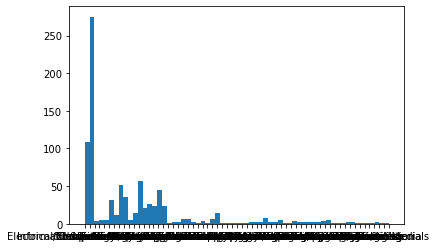

In [19]:
plt.hist(Fraud_Jobs_DataSet, bins=num_values)